# Here is the Main Script for Our Project

In [175]:
import numpy as np
import os
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd 
from astropy.table import Table
%matplotlib inline

## From Astroquery Classcode

## Query(SDSS) Rianne Data

In [178]:
from astroquery.sdss import SDSS

sdssquery = """
        SELECT s.specobjid, s.ra, s.dec, s.z, s.class,s.elodieTEff,s.velDisp
        FROM SpecObjALL s, dbo.fGetNearbyObjEq(149,0.129,2) n
        
"""

spec = SDSS.query_sql(sdssquery)
spec = spec[:10000]
print(spec)

    specobjid          ra       dec         z      class  elodieTEff velDisp 
------------------ --------- ---------- ---------- ------ ---------- --------
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
299489676975171584 146.71421 -1.0413043 0.02127545 GALAXY          0 135.8996
               ...       ...        ...        ...    ...       

In [180]:
# Converts table to Pandas Dataframe

def d2DF(astropy_tables):
    # Convert each Astropy table to a Pandas DataFrame and store in a list
    dataframes = [table.to_pandas() for table in astropy_tables]
    
    # Concatenate all DataFrames
    combined_dataframe = pd.concat(dataframes, ignore_index=True)
    
    return combined_dataframe

table1 = Table()

table1['type'] = spec['class']
table1['z'] = spec['z']
table1['elodieTEff'] = spec['elodieTEff']
table1['velDisp'] = spec['velDisp']

ndf = table1.to_pandas()
ndf = ndf.dropna()

print(ndf)

        type         z  elodieTEff   velDisp
0     GALAXY  0.021275           0  135.8996
1     GALAXY  0.021275           0  135.8996
2     GALAXY  0.021275           0  135.8996
3     GALAXY  0.021275           0  135.8996
4     GALAXY  0.021275           0  135.8996
...      ...       ...         ...       ...
9995  GALAXY  0.097556           0  168.4776
9996  GALAXY  0.097570           0  159.0764
9997  GALAXY  0.097570           0  159.0764
9998  GALAXY  0.097570           0  159.0764
9999  GALAXY  0.097570           0  159.0764

[10000 rows x 4 columns]


## First we organize the data for PCA and Training (X = features, y = Galaxy/QSO)


In [182]:
X = ndf.iloc[:, 1:4]
y = ndf.iloc[:, 0]

# print(X,y) # To Check

In [211]:
# Split the data into train and test (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [213]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaleStandard = StandardScaler()

X_train = scaleStandard.fit_transform(X_train)

In [215]:
# Convert to pandas dataframe
X_train = pd.DataFrame(X_train, columns=['z', 'elodieTEff', 'velDisp'])
X_train.head(10)

,z,elodieTEff,velDisp
0,-0.268738,-0.457390,1.615055
1,-0.378980,2.178921,-1.126271
2,-0.158799,-0.457390,0.895859
3,-0.259472,-0.457390,0.242025
4,-0.302240,-0.457390,-0.979454
5,-0.335231,-0.457390,0.007781
6,-0.302422,-0.457390,0.624712
7,2.193955,-0.457390,-1.126271
8,-0.378954,2.643341,-1.126271
9,5.385387,-0.457390,-1.126271


In [217]:
X_train.describe().round(18)

,z,elodieTEff,velDisp
count,8.000000e+03,8.000000e+03,8.000000e+03
mean,-2.000000e-17,-1.300000e-17,5.000000e-18
std,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.791564e-01,-4.573897e-01,-1.126271e+00
25%,-3.310802e-01,-4.573897e-01,-1.126271e+00
50%,-2.907513e-01,-4.573897e-01,1.682198e-02
75%,-1.829695e-01,-4.573897e-01,8.958592e-01
max,5.704581e+00,2.643341e+00,2.893127e+00


## PCA on the Split Data

In [219]:
from sklearn.decomposition import PCA

In [221]:
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_train)

What is the variance of each PCA component?

In [223]:
pca1.explained_variance_ratio_

array([0.50653998, 0.37520948, 0.11825054])

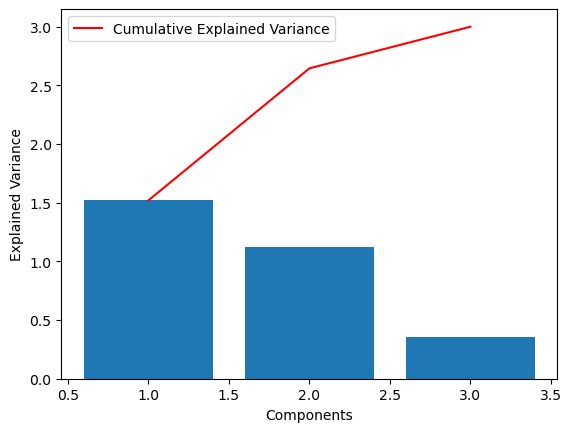

In [225]:
# Graph the variance

plt.bar(range(1,len(pca1.explained_variance_)+1), pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_)+1),
        np.cumsum(pca1.explained_variance_),
        c='red',
        label='Cumulative Explained Variance')
plt.legend(loc='upper left')

plt.show()

Plot the Princicpal Components to visiualize relationships

C:\Users\Navi\AppData\Local\Temp\ipykernel_28260\3948476078.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')
C:\Users\Navi\AppData\Local\Temp\ipykernel_28260\3948476078.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)


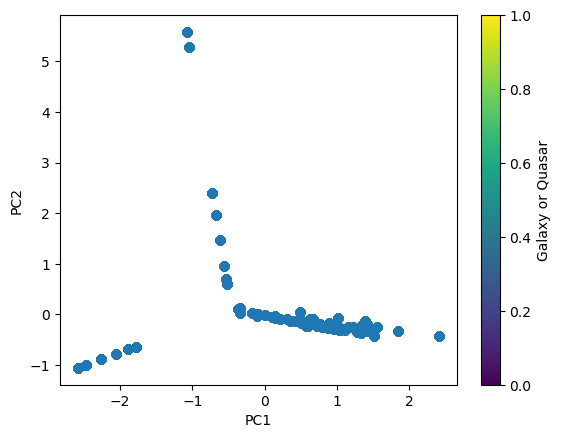

In [227]:
# Plot the first two principal components
colormap = plt.cm.get_cmap('coolwarm')

plt.figure()
scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(scatter, label="Galaxy or Quasar")
plt.show()

## Lets Start The KNN Algorithm

In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

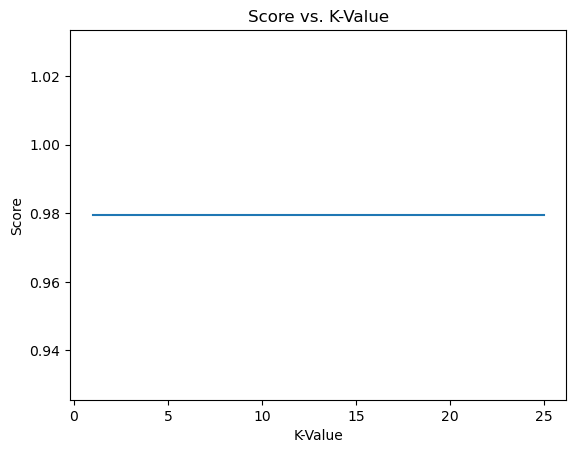

In [231]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
        
plt.plot(k_range, scores)
plt.title('Score vs. K-Value')
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.show()

In [233]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=16)

In [235]:
# Score of KNN for best K-Value
knn.score(X_test, y_test)

0.9795

In [237]:
# Lets test the accuracy with a Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[1435,    0,    0],
       [  41,  158,    0],
       [   0,    0,  366]], dtype=int64)

The Percentage Correct is: 0.9795, The Percentage Wrong is 0.0205


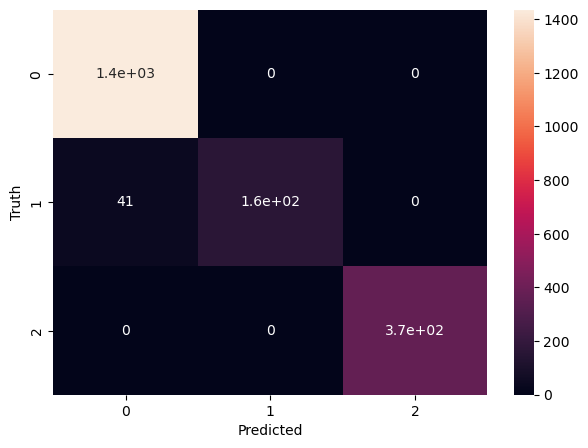

In [241]:
# Plot the confusion matrix
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Find the percentage correct
diagonal_sum = 0
# Loop through the matrix to calculate the diagonal sum
for i in range(len(cm)):
    diagonal_sum += cm[i][i]

n = len(cm) 
off_diagonal_sum = 0
for i in range(n):
    for j in range(n):
        if i != j:  # Check if the element is not on the diagonal
            off_diagonal_sum += cm[i][j]

Per_corr = diagonal_sum/len(X_test)
Per_wrong = off_diagonal_sum/len(X_test)
print(f"The Percentage Correct is: {Per_corr}, The Percentage Wrong is {Per_wrong}")

plt.show()

## Redoing Everything using the technique from StarGalQso Code/Paper on Classification

Get the Data: https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=II/357/des_dr1&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa

In [243]:
from astroquery.vizier import Vizier
from astropy import coordinates
import astropy.units as u
from astropy.table import QTable

from astropy.coordinates import ICRS
from astropy import units as u
coo = ICRS(9.8286667 *u.degree, -57.5175000*u.degree)


vquery = Vizier(columns=['**'], row_limit=10000)
result = vquery.query_region(coo, radius='1d0m0s', catalog='40A/data3')[0]

<strong> What are Object Types? </strong>
(From https://www.legacysurvey.org/dr9/description/): "Five of these are used in the Tractor fitting procedure: point sources, round exponential galaxies with a variable radius ("REX"), deVaucouleurs ("DEV") profiles (elliptical galaxies), exponential ("EXP") profiles (spiral galaxies), and Sersic ("SER") profiles. The sixth morphological type is "DUP," which is set for Gaia sources that are coincident with, and so have been fit by, an extended source. No optical flux is assigned to "DUP" sources, but they are retained to ensure that all Gaia sources appear in the catalogs even if Tractor preferred and fit a different source based on the deeper Legacy Surveys imaging." (We aren't using this)

<strong> Instead we are classifiying them based on the spread in different bands </strong>

In [244]:
# Color Magnitudes
g_r   = result['gmag'] - result['rmag']
r_i   = result['rmag'] - result['imag']
i_z   = result['imag'] - result['zmag']
z_y   = result['zmag'] - result['Ymag']


<strong> Here is how I converted Spread based on Band to a Morphological Object Classfication </strong>

In [245]:
# Spread based on Band
Exg = result['Exg']
Exr = result['Exr']
Exi = result['Exi']
Exz = result['Exz']
ExY = result['ExY']

# Spread Error based on Band
e_Exg = result['e_Exg']
e_Exr = result['e_Exr']
e_Exi = result['e_Exi']
e_Exz = result['e_Exz']
e_ExY = result['e_ExY']


# Classification per Spread (0 = High-Confidence Stars, 1 = Likely Stars, 2 = Mostly Galaxy, 3 = High Confidence Galaxy)
EXTENDED_CLASS_g = np.zeros(len(Exg))
EXTENDED_CLASS_r = np.zeros(len(Exg))
EXTENDED_CLASS_i = np.zeros(len(Exg))
EXTENDED_CLASS_z = np.zeros(len(Exg))
EXTENDED_CLASS_Y = np.zeros(len(Exg))

for i in np.arange(0,len(Exg)): 
    EXTENDED_CLASS_g[i] = int((Exg[i] + 3*e_Exg[i]) > 0.005) + int((Exg[i] + e_Exg[i]) > 0.003) + int((Exg[i] - e_Exg[i]) > 0.003)
    EXTENDED_CLASS_r[i] = int((Exr[i] + 3*e_Exr[i]) > 0.005) + int((Exr[i] + e_Exr[i]) > 0.003) + int((Exr[i] - e_Exr[i]) > 0.003)
    EXTENDED_CLASS_i[i] = int((Exi[i] + 3*e_Exi[i]) > 0.005) + int((Exi[i] + e_Exi[i]) > 0.003) + int((Exi[i] - e_Exi[i]) > 0.003)
    EXTENDED_CLASS_z[i] = int((Exz[i] + 3*e_Exz[i]) > 0.005) + int((Exz[i] + e_Exz[i]) > 0.003) + int((Exz[i] - e_Exz[i]) > 0.003)
    EXTENDED_CLASS_Y[i] = int((ExY[i] + 3*e_ExY[i]) > 0.005) + int((ExY[i] + e_ExY[i]) > 0.003) + int((ExY[i] - e_ExY[i]) > 0.003)



In [249]:
# This is for the graphing later, but I need to take all of the guesses and pick the most likely one
typeList = ["All", "High-Confidence Stars", "Likely Stars", "Mostly Galaxy", "High Confidence Galaxy"]

# This could MESS UP THE ACCURACY OF THE MODEL(NOTE!!!) I testing this idea.
EC_avg = np.zeros(len(Exg))
for i in np.arange(0,len(EXTENDED_CLASS_g)): 
    x = (EXTENDED_CLASS_g[i] + EXTENDED_CLASS_r[i] + EXTENDED_CLASS_i[i] + EXTENDED_CLASS_z[i] + EXTENDED_CLASS_Y[i])/5

    if x < 0.1:
        EC_avg[i] = 0
    elif 0.5 <= x < 1.5:
        EC_avg[i] = 1
    elif 1.5 <= x < 2.5:
        EC_avg[i] = 2
    elif 2.5 <= x <= 3:
        EC_avg[i] = 3
        
# Convert to string(ChatGPT)
mapping = {
    0: "High-Confidence Stars",
    1: "Likely Stars",
    2: "Mostly Galaxy",
    3: "High Confidence Galaxy"
}

def convert_to_strings(int_list):
    return [mapping[num] for num in int_list]

objtype = convert_to_strings(EC_avg)

result['type'] = objtype
objtype = result['type']


<strong> The code for these plot were taken from an online notebook. </strong>

In [258]:
#r-i vs. g-r colors

# 2D-histogram of objects
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
im1 = ax1.hexbin(r_i, g_r, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
ax1.set_xlabel('r-i',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)

#color bar
cb = plt.colorbar(im1,label='log(N)')

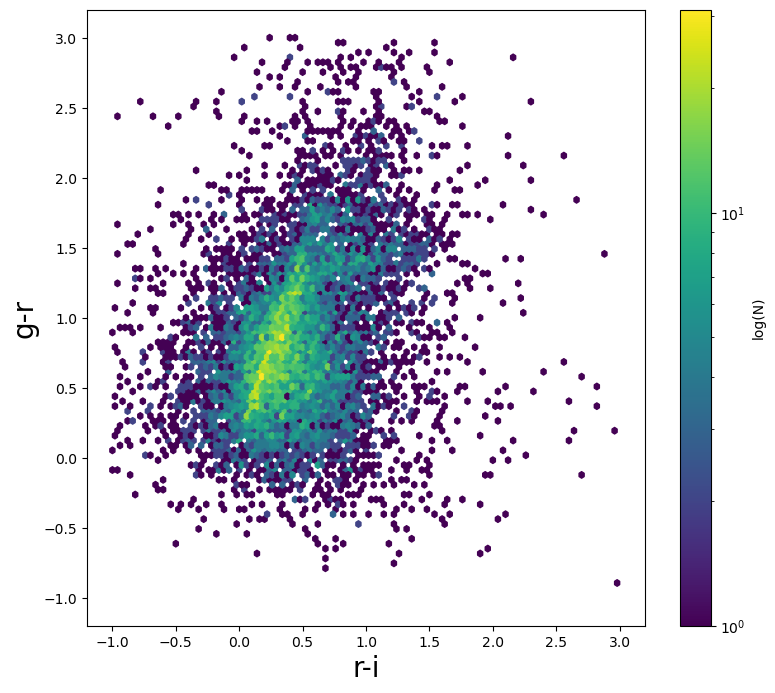

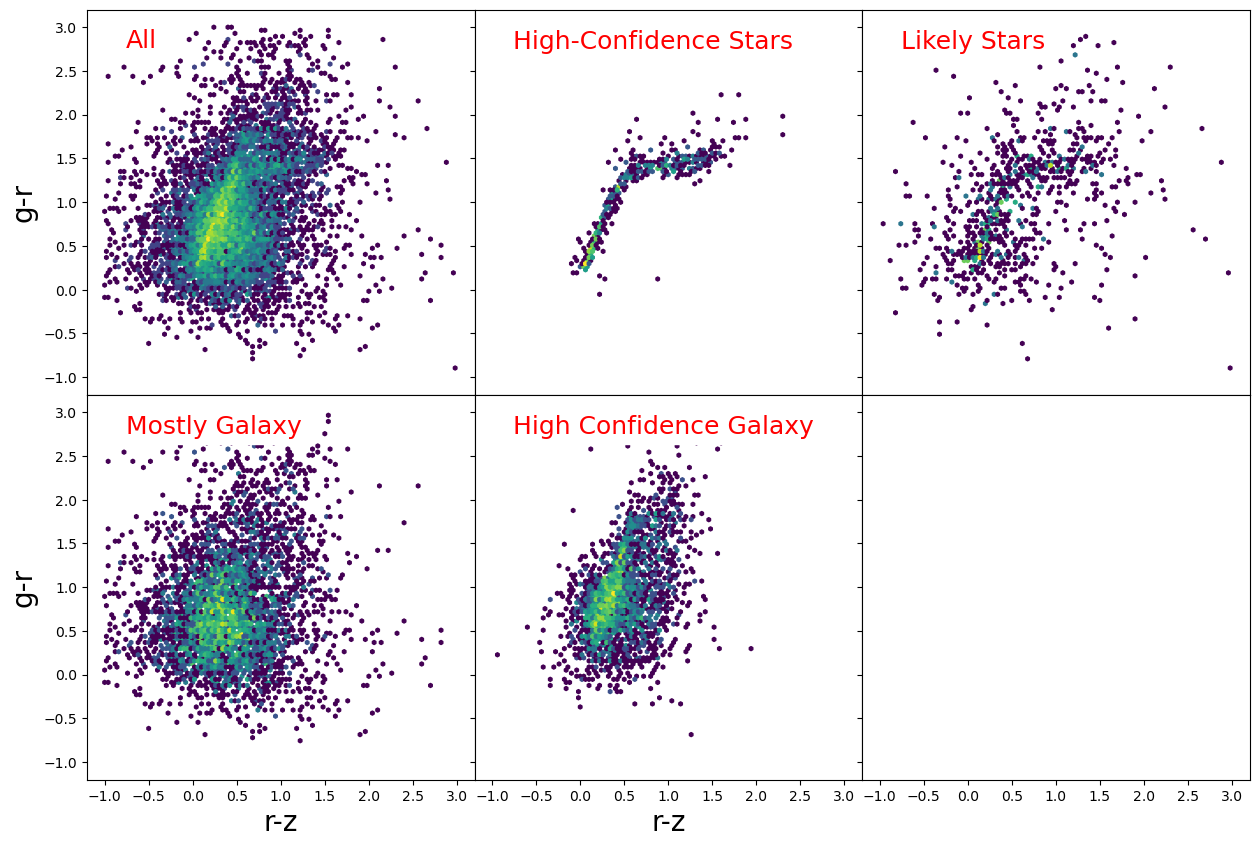

In [260]:
col0 = r_i   #r-z color
col1 = g_r   #g-r color

# Define figure to have 6 panels: 2 rows X 3 columns (with shared axes)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()   # flatten axes object to be able to loop over it

for i,typ in enumerate(typeList):
    
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(col0),dtype='bool')   #for All objects: array of 1's
    else:
        selec = (objtype==typ)    #for each type, select on the type parameter
        
    # 2D-histogram of objects with hexagonal bins
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
    if i>=3: ax.set_xlabel('r-z',fontsize=20)   #only label x axis for second (last) row
    if i%3==0: ax.set_ylabel('g-r',fontsize=20) #only label y axis for first column
    # Label the type on each panel (red font over white background)
    ax.text(0.1,0.9,typ,transform=ax.transAxes,fontsize=18,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0., hspace=0.)
# 
plt.show()

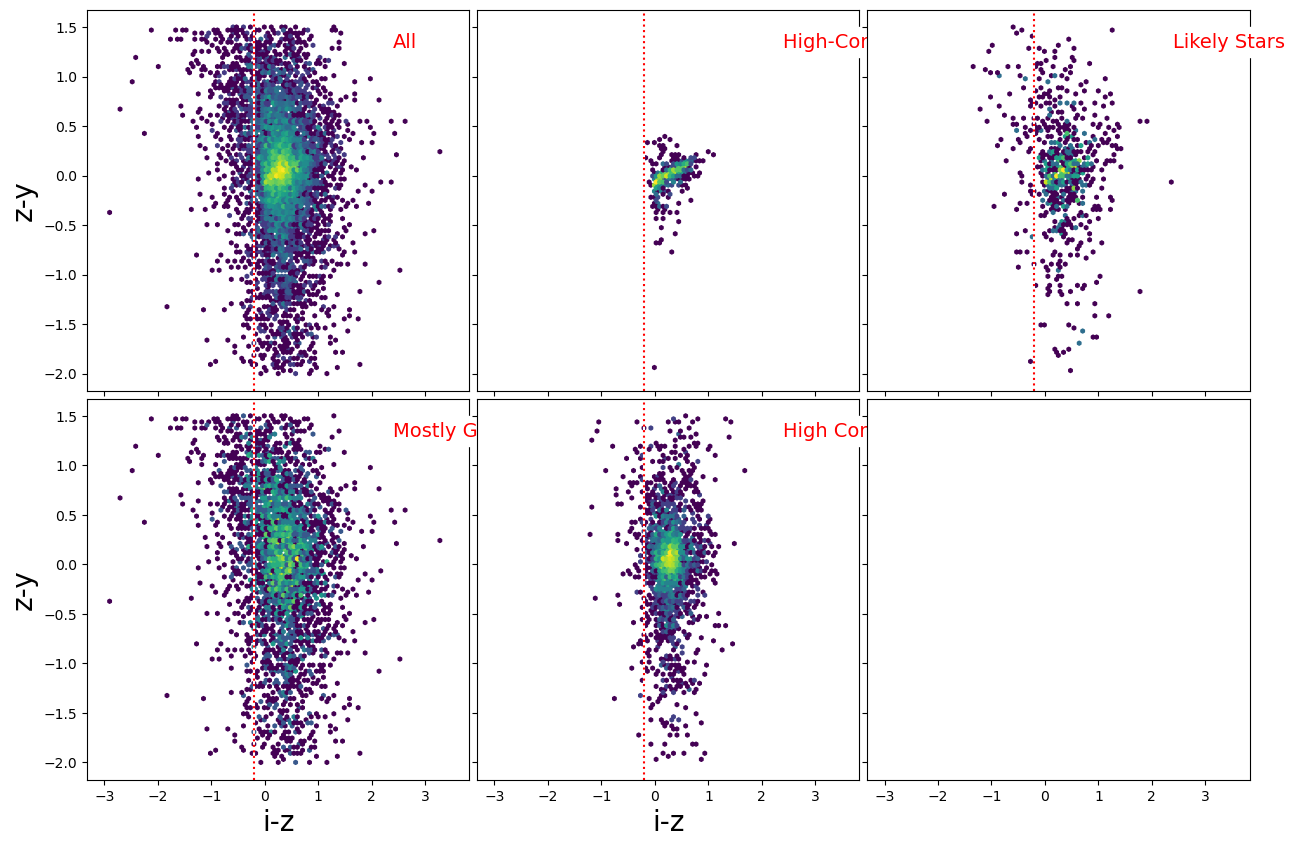

In [262]:
# First, try z-W1 versus infrared color W1-W2
col0 = i_z
col1 = z_y

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype),dtype='bool')
    else:
        selec = (objtype==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3.5, -2., 1.5))
    if i>=3: ax.set_xlabel('i-z',fontsize=20)
    if i%3==0: ax.set_ylabel('z-y',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')
    ax.axvline(-0.2,color='w',ls='-')
    ax.axvline(-0.2,color='r',ls=':')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

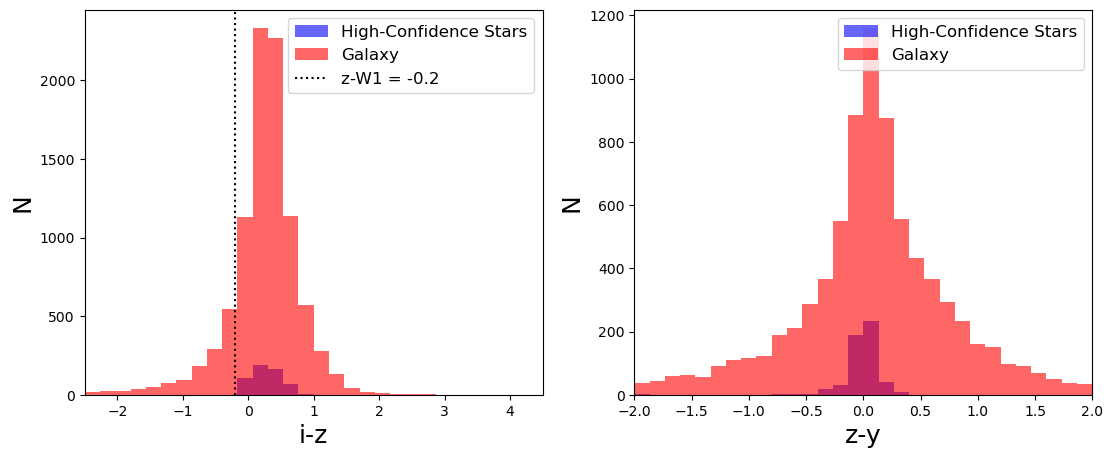

In [266]:
is_psf = (objtype=='High-Confidence Stars')

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes = axes.flatten()

colors = [i_z, z_y]
colnames = ['i-z', 'z-y']
xlims = [[-2.5,4.5],[-2.,2.]]

for i,col in enumerate(colors):
    ax = axes[i]
    ax.hist(col[is_psf], 30, range=xlims[i], color='b', alpha=0.6, label='High-Confidence Stars')
    ax.hist(col[~is_psf], 30, range=xlims[i], color='r', alpha=0.6, label='Galaxy')
    ax.set_xlabel(colnames[i],fontsize=18)
    ax.set_ylabel('N',fontsize=18)
    ax.set_xlim(xlims[i])
    if i==0: ax.axvline(-0.2, ls=':', color='k', label='z-W1 = -0.2')
    ax.legend(fontsize=12)

plt.show()

## Run PCA on Data Above

In [268]:
def d2DF(astropy_tables):
    # Convert each Astropy table to a Pandas DataFrame and store in a list
    dataframes = [table.to_pandas() for table in astropy_tables]
    
    # Concatenate all DataFrames
    combined_dataframe = pd.concat(dataframes, ignore_index=True)
    
    return combined_dataframe
# print(g_r,r_i,i_z)
table = Table()

table['g_r']   = result['gmag'] - result['rmag']
table['r_i']   = result['rmag'] - result['imag']
table['i_z']   = result['imag'] - result['zmag']
table['z_y']   = result['zmag'] - result['Ymag']
table['type'] = objtype

df = table.to_pandas()
df = df.dropna()

X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

scaleStandard = StandardScaler()

X_train = scaleStandard.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=['g_r', 'r_i', 'i_z','z_y'])

X_train.head(10)

,g_r,r_i,i_z,z_y
0,2.247511,1.469998,0.042136,0.659873
1,0.435731,-1.481418,-0.210522,-0.065733
2,-1.004314,-1.404015,-0.263134,-0.208311
3,-0.983554,-0.685563,0.542439,0.037569
4,-0.398844,-0.430708,-0.254269,-0.006022
5,-0.207227,-0.492055,-0.168316,-0.123059
6,0.152262,-0.453559,0.308476,0.357915
7,-0.361357,-0.070453,-0.334634,0.613898
8,-0.533559,-0.729617,0.177426,0.138826
9,-1.235809,-0.840164,-1.072177,-0.146557


In [272]:
X_train.describe().round(18)

,g_r,r_i,i_z,z_y
count,6.792000e+03,6.792000e+03,6.792000e+03,6.792000e+03
mean,2.700000e-17,2.500000e-17,-3.600000e-17,-3.000000e-18
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-8.434688e+00,-9.908710e+00,-9.474813e+00,-6.604579e+00
25%,-6.269782e-01,-5.740383e-01,-3.384882e-01,-2.972803e-01
50%,-1.252327e-01,-1.011263e-01,7.297109e-02,1.775967e-02
75%,5.362440e-01,5.109471e-01,4.624121e-01,3.982143e-01
max,7.306187e+00,1.276286e+01,8.539012e+00,5.678377e+00


In [274]:
from sklearn.decomposition import PCA

pca1 = PCA()

X_pca1 = pca1.fit_transform(X_train)

In [276]:
pca1.explained_variance_ratio_

array([0.36127789, 0.28681004, 0.19185029, 0.16006179])

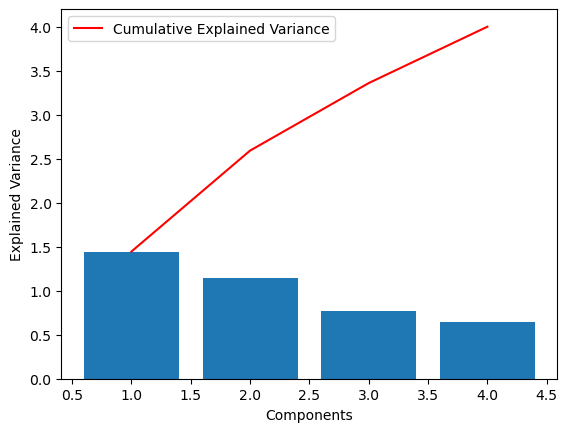

In [278]:
plt.bar(range(1,len(pca1.explained_variance_)+1), pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_)+1),
        np.cumsum(pca1.explained_variance_),
        c='red',
        label='Cumulative Explained Variance')
plt.legend(loc='upper left')

plt.show()

C:\Users\Navi\AppData\Local\Temp\ipykernel_28260\3291635849.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')
C:\Users\Navi\AppData\Local\Temp\ipykernel_28260\3291635849.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)


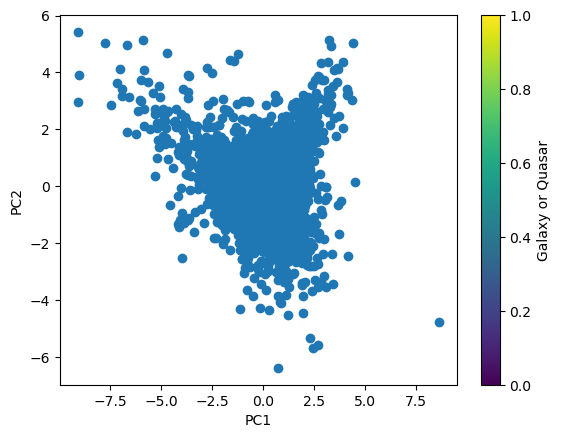

In [280]:
colormap = plt.cm.get_cmap('coolwarm')

plt.figure()
scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(scatter, label="Galaxy or Quasar")
plt.show()

## Lets Train the ML Model (KNN Algorithm) 

<strong> First we need to figure out the best K-Value for the data </strong>

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

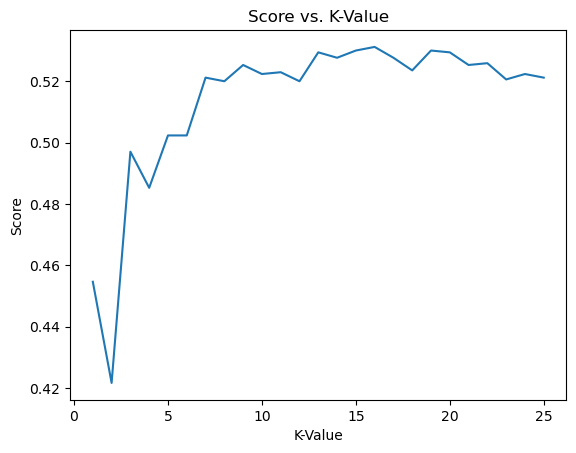

In [284]:

k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# base = 0
# k = []
# for index, score in enumerate(scores): 
#     maxK = score
#     if maxk > base:
#         base = maxk
#         k.append(index)
        



plt.plot(k_range, scores)
plt.title('Score vs. K-Value')
plt.xlabel("K-Value")
plt.ylabel("Score")
# print(f"The best K-Value is {pK}")
plt.show()

In [294]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=16)

In [296]:
knn.score(X_test, y_test)

0.5312131919905771

In [298]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[412,  33,  16, 122],
       [ 92,  14,   0,  11],
       [ 83,  10,   2,  68],
       [324,  21,  16, 474]], dtype=int64)

The Percentage Correct is: 0.5312131919905771, The Percentage Wrong is 0.46878680800942285


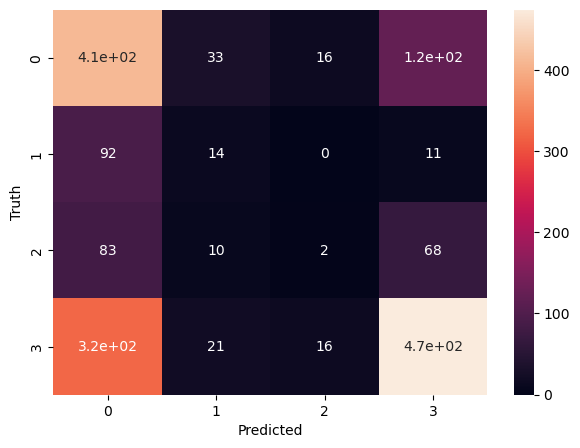

In [300]:
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Find the percentage correct
diagonal_sum = 0
# Loop through the matrix to calculate the diagonal sum
for i in range(len(cm)):
    diagonal_sum += cm[i][i]

n = len(cm) 
off_diagonal_sum = 0
for i in range(n):
    for j in range(n):
        if i != j:  # Check if the element is not on the diagonal
            off_diagonal_sum += cm[i][j]

Per_corr = diagonal_sum/len(X_test)
Per_wrong = off_diagonal_sum/len(X_test)
print(f"The Percentage Correct is: {Per_corr}, The Percentage Wrong is {Per_wrong}")

plt.show()